<div style="line-height:0.5">
<h1 style="color:#FF7C00  "> Regression in TensorFlow </h1>
<h4> Neural Networks fundamentals in Tensorflow. </h4>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3>  
    keras.utils + HTML color text + regression metrics + keras.optimizers + save models
</span>
</div> 

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
%%script echo Skipping, just for Colab
""" Color text in Colab
Markdown cell in Colab does not work as other notebook, to change the color of a tex, instead of type this:
#<span style="color:red">Regression example 1 NN </span> --> dont use a markdown cell
This is not working either:
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
"""
from google.colab import files
from IPython.display import HTML, display

def color_text(s, color):
    #display(HTML("<text style=color:{}>{}</text>".format(color, s)))
    display(HTML("<text style='color:{}; font-size:{}px'>{}</text>".format(color, 35, s)))

color_text("Neural Networks fundamentals in Tensorflow", "red")

Skipping, just for Colab


<div style="line-height:0.5">
<h3 style="color:#FF7C00  "> Recap: Hyperparameters </h3>
</div>

- Input layer shape: Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)
- Hidden layer(s): Problem specific, minimum = 1, maximum = unlimited
- Neurons per hidden layer:	Problem specific, generally 10 to 100
- Output layer shape: Same shape as desired prediction shape (e.g. 1 for house price)
- Hidden activation: Usually ReLU (rectified linear unit)
- Output activation: None, ReLU, logistic/tanh
- Loss function	MSE: (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers
- Optimizer: SGD (stochastic gradient descent), Adam

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

<h2 style="color:#FF7C00  "> <u> Generic Info </u></h2>

In [ ]:
def build_model():
    """ Create a sequential model with one fully-connected layer """
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(1,))
        ])
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

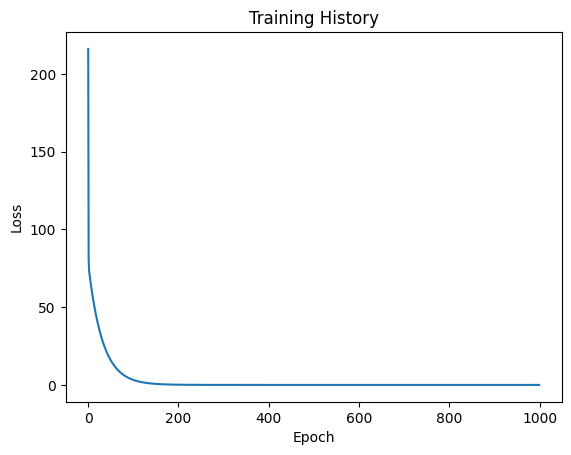

1/1 [==============================] - 0s 76ms/step


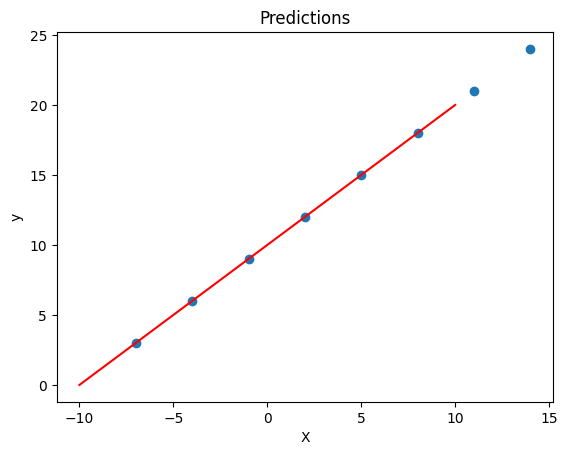

In [ ]:
# Features and labels
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Model
model = build_model()
# Training
history = model.fit(X, y, epochs=1000, verbose=0)

###### Display training
plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Predict
X_new = np.array([-10.0, -5.0, 0.0, 5.0, 10.0])
y_pred = model.predict(X_new)

###### Display predictions
plt.figure(figsize=(5, 5))
plt.scatter(X, y)
plt.plot(X_new, y_pred, color='red')
plt.title('Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
""" Check shapes with scalars (no shape)
N.B.
No matter what kind of data we pass to our model, it's always going to take as input and return as output some kind of tensor. """
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape 

((), ())

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
house_info.shape

TensorShape([3])

In [1]:
%%script echo Skipping, using normal text for markdown cells
def color_text(s, color):
     """ Output a text colored in the given color. """
     display(HTML("<text style='color:{}; font-size:{}px'>{}</text>".format(color, 24, s)))

color_text("Regression Examples", "blue")

Skipping, using normal text for markdown cells


<div style="line-height:0.5">
<h2 style="color:#FF7C00  "> Regression Examples </h2>
</div>

<h3 style="color:#FF7C00  "> <u> Example #0 </u></h3>

<h3 style="color:#FF7C00  "> Recap: </h3>
<div style="margin-top: -10px;">

tf.GradientTape is a context manager that records operations for automatic differentiation => to compute gradients of a computation with respect to some variables.
</div>

In [6]:
# Define model
def dummy_model(x, w):
    return x * w

def train_step(x, y, w, learning_rate=0.01):
    with tf.GradientTape() as tape:
        y_pred = dummy_model(x, w)
        loss = tf.reduce_mean(tf.square(y - y_pred))

    # Compute gradients
    gradients = tape.gradient(loss, [w])
    # Update weights
    w.assign_sub(learning_rate * gradients[0])

    return loss

In [8]:
# Create variables
w = tf.Variable(0.0, name="weights")
## Samples
x_data = tf.constant([1.0, 2.0, 3.0, 4.0], dtype=tf.float32)
y_data = tf.constant([2.0, 4.0, 6.0, 8.0], dtype=tf.float32)

###### Training 
epochs = 1000
for epoch in range(epochs):
    loss = train_step(x_data, y_data, w)
    if epoch % 100 == 0:
        print(f"Epoch num {epoch}: Loss is : {loss.numpy()}")


Epoch num 0: Loss is : 30.0
Epoch num 100: Loss is : 8.988365607365267e-13
Epoch num 200: Loss is : 8.988365607365267e-13
Epoch num 300: Loss is : 8.988365607365267e-13
Epoch num 400: Loss is : 8.988365607365267e-13
Epoch num 500: Loss is : 8.988365607365267e-13
Epoch num 600: Loss is : 8.988365607365267e-13
Epoch num 700: Loss is : 8.988365607365267e-13
Epoch num 800: Loss is : 8.988365607365267e-13
Epoch num 900: Loss is : 8.988365607365267e-13


<h2 style="color:#FF7C00  "> <u> Example #1 </u></h2>

In [ ]:
tf.random.set_seed(42)

### Neural Network Model using the Sequential API (as a sequence of layers) #in this case one.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
### Compile the model
model.compile(loss=tf.keras.losses.mae,           # mean absolute error
            optimizer=tf.keras.optimizers.SGD(),  # stochastic gradient descent
            metrics=["mae"])                      # mean absolute error

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 368ms/step - loss: 17.8441 - mae: 17.8441
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 17.5629 - mae: 17.5629
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 17.2816 - mae: 17.2816
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 17.0004 - mae: 17.0004
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 16.7191 - mae: 16.7191


In [ ]:
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [ ]:
### Test prediction
print(model.predict([17.0]))
print(model.predict([18.0]))
print(model.predict([19.0]))

1/1 [==============================] - 0s 148ms/step
[[-11.995292]]
1/1 [==============================] - 0s 245ms/step
[[-12.703103]]
1/1 [==============================] - 0s 304ms/step
[[-13.410914]]


In [ ]:
""" Increase the number of epochs to improve results. """
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [ ]:
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 65ms/step


array([[29.399702]], dtype=float32)

In [ ]:
## Datasets
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)
X, y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [ ]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
print(len(X))

## Split data into train and test sets
X_train = X[:40]  #first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:]   #last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

50


(40, 10)

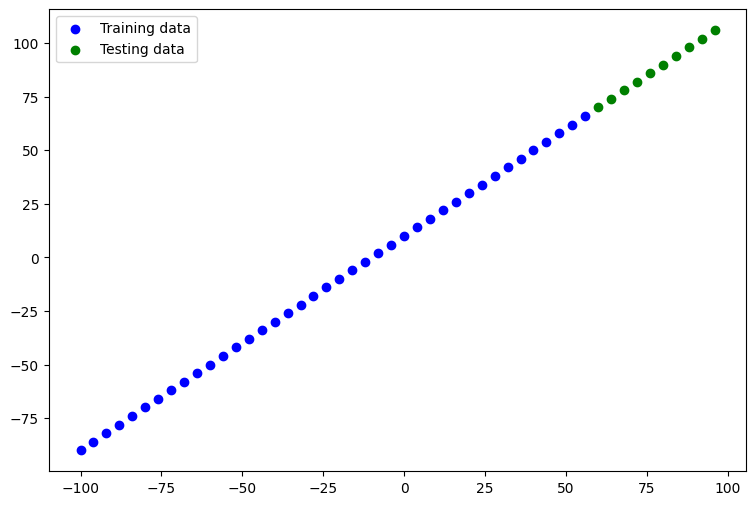

In [ ]:
""" Display data """
plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

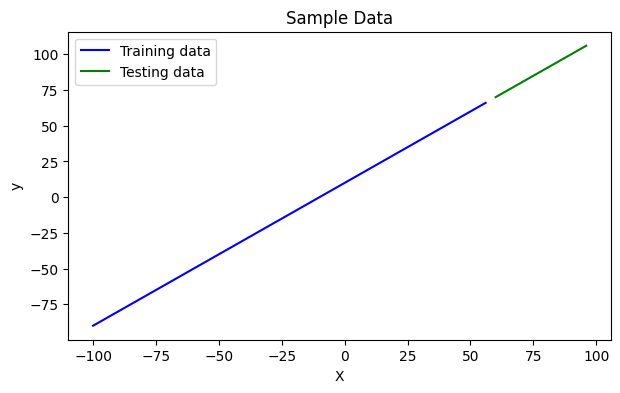

In [ ]:
""" Lines visualization """
plt.figure(figsize=(7, 4))
plt.plot(X_train, y_train, c='b', label='Training data')
plt.plot(X_test, y_test, c='g', label='Testing data')
plt.title('Sample Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [ ]:
""" Show model info.
N.B. 
works only when model is fitted """
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


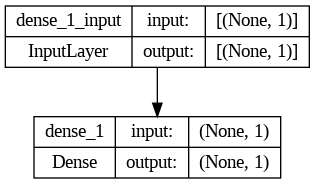

In [ ]:
# Show 2D plot
plot_model(model, show_shapes=True)

In [ ]:
# Make predictions
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 52ms/step


array([[101.3038  ],
       [107.99255 ],
       [114.681305],
       [121.37006 ],
       [128.05882 ],
       [134.74757 ],
       [141.43633 ],
       [148.12508 ],
       [154.81384 ],
       [161.5026  ]], dtype=float32)

In [ ]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = y_preds):        
    """ Plots training data, test data and compares predictions. """
    plt.figure(figsize=(7, 5))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend()
    plt.show()

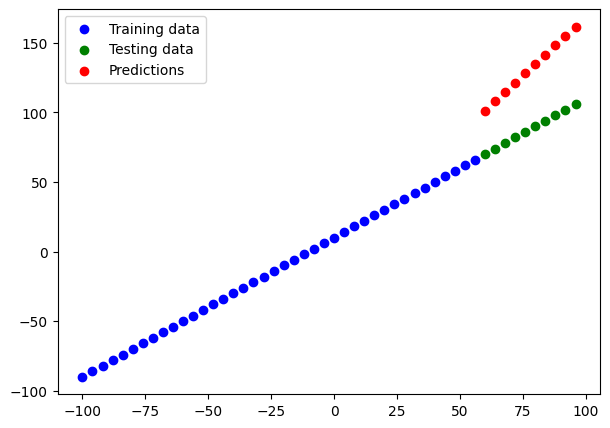

In [ ]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_preds)

<div style="line-height:0.5">
<h3 style="color:#FF7C00  "> Metrics: Evaluate predictions </h3>
</div>

- Mean absolute error (MAE) => the mean difference between each of the predictions. 
- Mean squared error (MSE) => the squared mean difference between of the predictions

In [ ]:
# 1
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 245ms/step - loss: 43.4032 - mae: 43.4032


[43.403194427490234, 43.403194427490234]

In [ ]:
# 2 
""" Mean Absolute Error MAE.
Return 10 values because y_test and y_preds tensors have different shapes.
y_test.shape, y_preds.shape --> ((10,), (10, 1)) --> we neef to squeeze """

mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.382281, 19.992554, 26.681305, 33.370064, 40.058823, 46.747574,
       53.43633 , 60.125072, 66.81384 , 73.502594], dtype=float32)>

In [ ]:
y_preds.squeeze().shape

(10,)

In [ ]:
## Using squeeze() to make same shape
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=43.403194>

In [ ]:
## Or...with reduce_mean we can obtain same result as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float32, numpy=1943.4801>

In [ ]:
# 3 
""" Mean Square Error MSE """"
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_preds.squeeze())
mse

<h2 style="color:#FF7C00  "> <u> Example #2 </u></h2>

In [ ]:
def my_mae(y_test, y_pred):
  """ Calculuates mean absolute error between y_test and y_preds. """
  return tf.metrics.mean_absolute_error(y_test, y_pred)

def my_mse(y_test, y_pred):
  """ Calculates mean squared error between y_test and y_preds. """
  return tf.metrics.mean_squared_error(y_test, y_pred)

In [ ]:
""" Try one NN """
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)])

### Compile
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Train
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 9.9783 - mae: 9.9783
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 10.9652 - mae: 10.9652
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 16.1780 - mae: 16.1780
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6027 - mae: 8.6027
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8891 - mae: 10.8891
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.0642 - mae: 10.0642
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0995 - mae: 9.0995
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0898 - mae: 9.0898
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 15.0521 - mae: 15.0521
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5747 - mae: 7.5747
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - lo

1/1 [==============================] - 0s 91ms/step


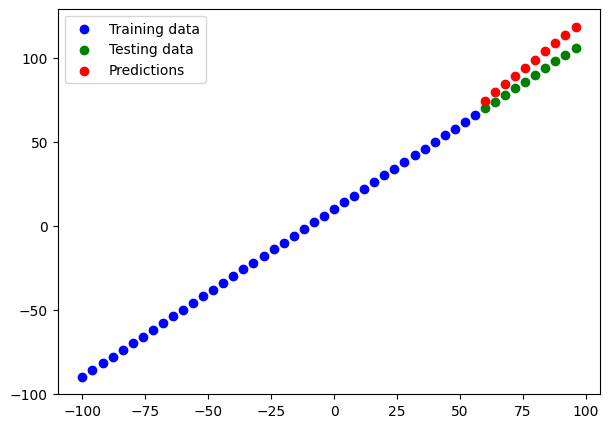

In [ ]:
## Model_1 predictions
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
""" Model_1 metrics """
mae_1 = my_mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = my_mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(8.65746, 81.49065)

In [ ]:
""" Trying another NN. """
tf.random.set_seed(12)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)    #add a second layer
  ])

### Compile
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100) #, verbose=0)  #set verbose to 0, to avoid long ouput with resutls for each Epochs

Epoch 1/100
2/2 [==============================] - 1s 17ms/step - loss: 36.1105 - mae: 36.1105
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 21.8484 - mae: 21.8484
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 26.3355 - mae: 26.3355
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 13.7399 - mae: 13.7399
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.8792 - mae: 12.8792
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 20.2329 - mae: 20.2329
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2298 - mae: 10.2298
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 19.4485 - mae: 19.4485
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 17.1074 - mae: 17.1074
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 16.2534 - mae: 16.2534
Epoch 11/100
2/2 [==============================] - 0s 7

1/1 [==============================] - 0s 85ms/step


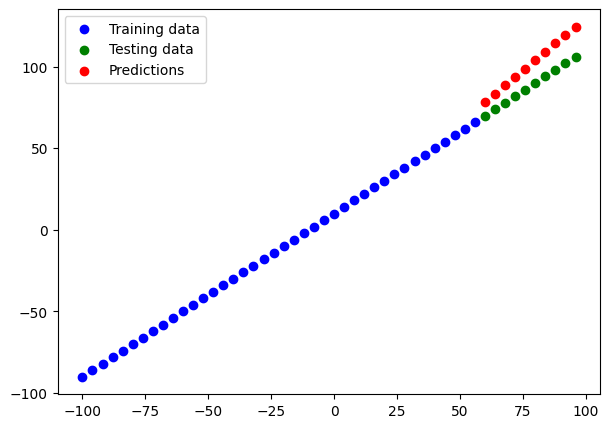

In [ ]:
## Predict and Plot results
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
## Model_2 metrics
mae_2 = my_mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = my_mse(y_test, y_preds_2.squeeze()).numpy()

print("mae_2 is {}".format(mae_2))
print("mse_2 is {}".format(mse_2))

mae_2 13.418400764465332
mse_2 190.27874755859375


<h2 style="color:#FF7C00  "> <u> Example #3 </u></h2>

In [ ]:
"""
N.B. 
Same NN as model_2
"""
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit (for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 339ms/step


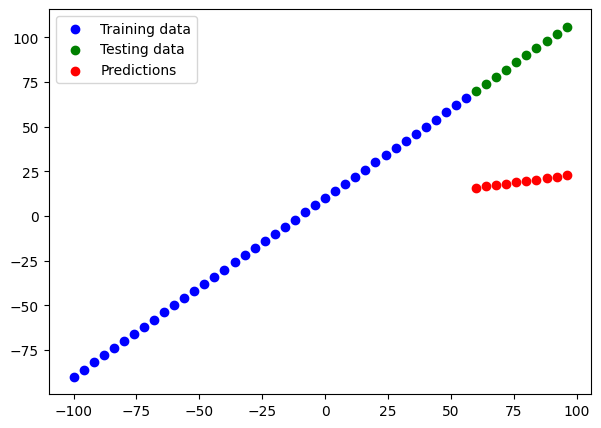

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
## Metrics model_3
mae_3 = my_mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = my_mse(y_test, y_preds_3.squeeze()).numpy()
print("mae_3 {}".format(mae_3))
print("mse_3 {}".format(mse_3))

mae_3 68.70284271240234
mse_3 4806.56103515625


In [ ]:
model_results = [["model_1", mae_1, mse_1],
                ["model_2", mae_2, mse_2],
                ["model_3", mae_3, mae_3]]

In [ ]:
compar = pd.DataFrame(model_results, columns=["model", "MAE", "MSE"])
compar

,model,MAE,MSE
0,model_1,8.657460,81.490646
1,model_2,13.418401,190.278748
2,model_3,68.702843,68.702843


<h2 style="color:#FF7C00  ">  <u> Store / Save models </u> </h2>

In [ ]:
model_2.save('best_model_SavedModel_format')

In [ ]:
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [ ]:
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end


In [ ]:
!ls best_model_HDF5_format.h5


best_model_HDF5_format.h5


<h2 style="color:#FF7C00  ">  <u> Load models </u> </h2>

In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")

loaded_saved_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


<h2 style="color:#FF7C00  ">  <u> Compare models </u> </h2>

In [ ]:
""" Compare model_2 with the SavedModel version --> return True! """

model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
my_mae(y_test, saved_model_preds.squeeze()).numpy() == my_mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 37ms/step


True

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")

loaded_h5_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
""" Compare model_2 with the loaded HDF5 version (should return True) """
h5_model_preds = loaded_h5_model.predict(X_test)

my_mae(y_test, h5_model_preds.squeeze()).numpy() == my_mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 23ms/step


True

<h4 style="color:#FF7C00  ">  Download a model (from Google Colab) </h4>

In [ ]:
#from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h2 style="color:#FF7C00  "> <u> Example #4 </u></h2>

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Turn all categories into numbers with onehot
insurance_one_hot = pd.get_dummies(insurance)
# View the converted columns
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
## Features and Labels
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
""" Training and test sets """
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tf.random.set_seed(42)

### Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
### Compile
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])
# Train
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8978.5996 - mae: 8978.5996


[8978.599609375, 8978.599609375]

<div style="line-height:0.64">
<h3 style="color:#FF7C00  "> Possible  improvements? </h3> 
</div>
<div style="line-height:1.6">

- Increasing the number of layers (2 -> 3)    
- Increasing the number of units in each layer (except for the output layer)   
- Changing the optimizer (from SGD to Adam)  
</div>

In [ ]:
tf.random.set_seed(42)

#### Create NN with an extra layer and an increased number of units
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # 100 units
    tf.keras.layers.Dense(10), # 10 units
    tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

### Compile
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                        metrics=['mae'])

# Train the model and save the history
history_fit = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Model evaluation
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4807.3457 - mae: 4807.3457


[4807.345703125, 4807.345703125]

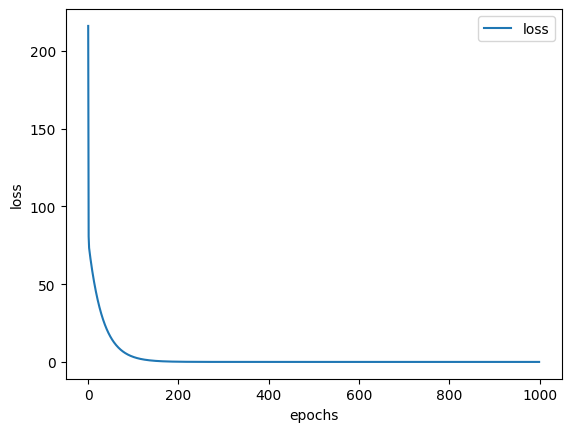

In [ ]:
### Display loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
## Try training for 100 more epochs
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

## Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 3491.2788 - mae: 3491.2788


(3491.27880859375, 3491.27880859375)

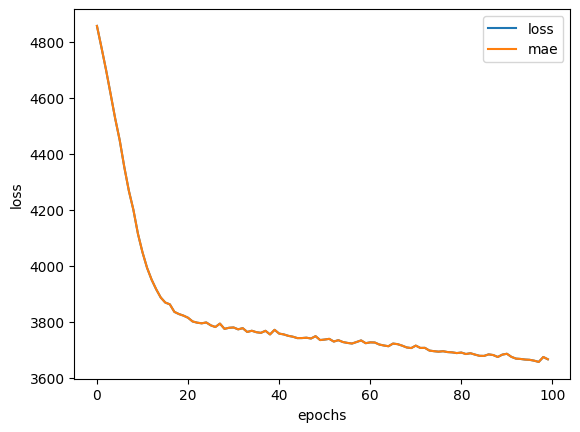

In [ ]:
""" Plot the model trained for 200 total epochs loss curves
N.B. 
Epochs will only show 100 since we overrid the history variable. 
"""
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.show()

<span>
<div style="line-height:0.64">
<h3 style="color:#FF7C00  "> Improve model thanks to data Preprocessing (normalization and standardization): </h3> 
</div>
<div style="line-height:1.6">
Preprocessing pipeline (a series of functions).  <br>
Normalization = A common practice = all of the data are in the range from 0 to 1, scaling all values from their original range. <br> 
Standardization = converts all data to unit variance and 0 mean. <br> 
</div>
</span>

<div style="line-height:1.5">
It is necessary to transform the non-numerical columns into numbers, normalizing the numerical columns with different ranges <br>
(to make sure they're all between 0 and 1).
<div style="line-height:1.6">

- 'make_column_transformer()' - build a multi-step data preprocessing function for the folllowing transformations  
    - MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).   
    - OneHotEncoder - one hot encode the non-numerical columns.
</div>
</div>

In [ ]:
### Column transformer to normalize
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state to ensure same split as before

In [ ]:
# Fit column transformer
ct.fit(X_train)

## Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder) defined in ct
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal.shape, X_train.shape


((1070, 11), (1070, 6))

<h2 style="color:#FF7C00  "> <u> Example #5 </u></h2>

In [ ]:
x_train = np.random.uniform(low=-1.0, high=1.0, size=(1000, 10))
y_train = np.sum(x_train, axis=1) + np.random.normal(scale=0.1, size=(1000,))
x_test = np.random.uniform(low=-1.0, high=1.0, size=(100, 10))
y_test = np.sum(x_test, axis=1) + np.random.normal(scale=0.1, size=(100,))

####### NN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),                     #dropout layer to prevent overfitting
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)
])

### Optimizers (compare performance of Adam, SGD, RMSprop)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.01)

# Compile
model.compile(optimizer=adam, loss='mse', metrics=['mae'])

In [ ]:
# Train
history = model.fit(x, y, epochs=100, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(x_test, y_test)
print('Test MAE:', test_mae)

Epoch 1/100
25/25 [==============================] - 3s 24ms/step - loss: 2.2023 - mae: 1.1758 - val_loss: 0.9388 - val_mae: 0.7797
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.3165 - mae: 0.4424 - val_loss: 0.1359 - val_mae: 0.2879
Epoch 3/100
25/25 [==============================] - 0s 12ms/step - loss: 0.1700 - mae: 0.3184 - val_loss: 0.0954 - val_mae: 0.2361
Epoch 4/100
25/25 [==============================] - 0s 14ms/step - loss: 0.1152 - mae: 0.2653 - val_loss: 0.0593 - val_mae: 0.1861
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0932 - mae: 0.2370 - val_loss: 0.0512 - val_mae: 0.1681
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0804 - mae: 0.2241 - val_loss: 0.0747 - val_mae: 0.2273
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0802 - mae: 0.2225 - val_loss: 0.0423 - val_mae: 0.1604
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0639